# Problem Statement:

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


### Data Description :

- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
Fraud = pd.read_csv('Fraud_check.csv')
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [3]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
Fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
Fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


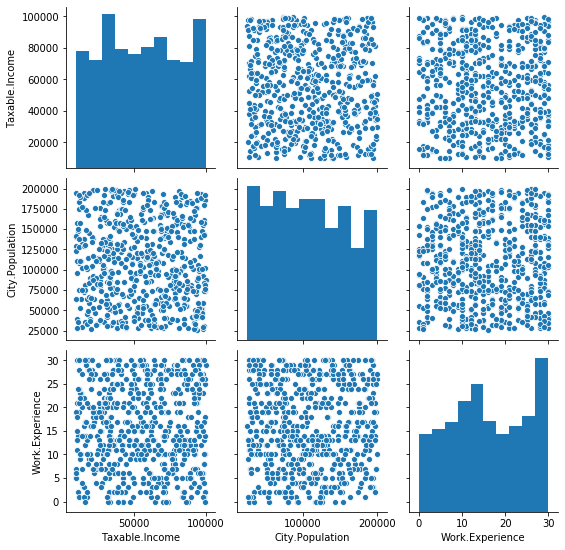

In [6]:
sns.pairplot(Fraud)

In [7]:
Fraud['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [8]:
Fraud['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [9]:
Fraud['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [10]:
fr = Fraud.copy() 

### Independent Variables

In [11]:
frx = fr[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]

In [12]:
frx.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO


In [13]:
frx_encoded = pd.get_dummies(frx, columns = ['Undergrad', 'Marital.Status', 'Urban'])
frx_encoded.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [14]:
frx_encoded.shape

(600, 9)

### Dependent variable

In [15]:
fr.loc[fr["Taxable.Income"] <= 30000,"TaxIn"]="Risky"
fr.loc[fr["Taxable.Income"] >= 30000,"TaxIn"]="Good"

fr.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxIn
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [23]:
fr['TaxIn'].value_counts()

Good     476
Risky    124
Name: TaxIn, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 

fry = lb.fit_transform(fr.TaxIn)

In [17]:
fry.shape

(600,)

In [18]:
fry

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

# Building Preliminary Classification Tree

In [24]:
X_train, X_test, y_train, y_test = train_test_split(frx_encoded, fry, test_size = 0.3, random_state=40)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((420, 9), (420,), (180, 9), (180,))

In [26]:
clfdf = DecisionTreeClassifier(random_state = 40)

In [27]:
clfdf = clfdf.fit(X_train, y_train)

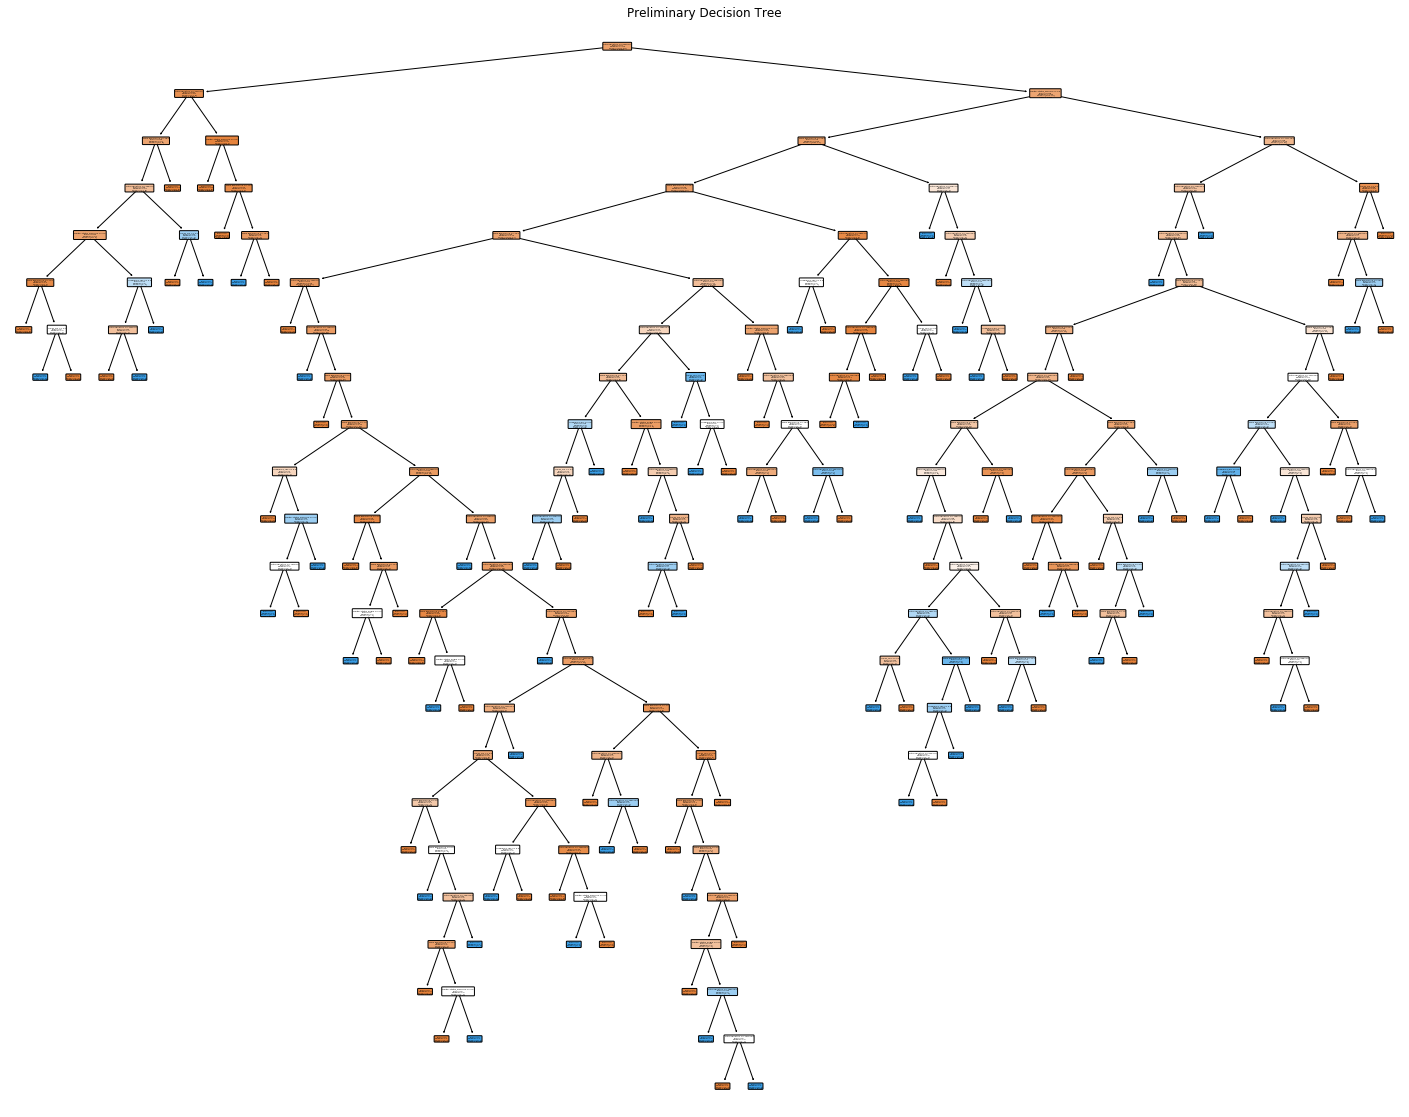

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,20))
tree.plot_tree(clfdf, 
               filled = True, 
               rounded = True, 
               class_names = ['Risky','Good'],
               feature_names = frx_encoded.columns)
plt.title('Preliminary Decision Tree')
plt.show()

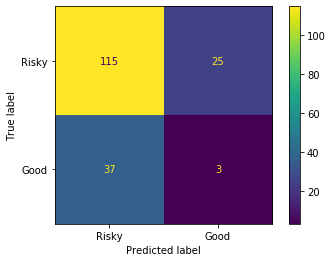

In [32]:
plot_confusion_matrix(clfdf, X_test, y_test, display_labels = ['Risky','Good'])

In [33]:
clfdf.score(X_test, y_test)

0.6555555555555556

# Balancing Data : SMOTE

In [34]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [36]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [37]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 336, 1: 84})
After SMOTE : Counter({0: 336, 1: 336})


# Prunning Decision Tree

### Cost Complexitiy Prunning Part 1 : Visualizing alpha

In [38]:
path = clfdf.cost_complexity_pruning_path(X_train_smote, y_train_smote)

In [39]:
ccp_alphas = path.ccp_alphas

In [40]:
clfdfs = []

for ccp_alpha in ccp_alphas:
    clfdf = DecisionTreeClassifier(random_state = 40, ccp_alpha = ccp_alpha)
    clfdf.fit(X_train_smote, y_train_smote)
    clfdfs.append(clfdf)

In [41]:
# Now get the accuracy of tree using training and testing datasets as function of alpha

train_score = [clfdf.score(X_train_smote, y_train_smote) for clfdf in clfdfs]

In [42]:
test_score = [clfdf.score(X_test, y_test) for clfdf in clfdfs]

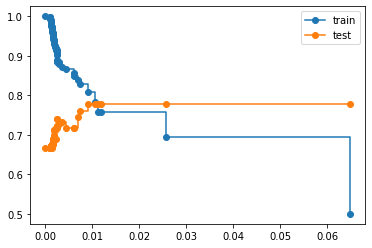

In [43]:
fig, ax = plt.subplots()
#ax.set_xlable('alpha')
#ax.set_ylabel('Accuracy')
ax.plot(ccp_alphas, train_score, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_score, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

### Part 2: Cross Validation for finding best Alpha value

In [44]:
clfdt = DecisionTreeClassifier(random_state = 40, ccp_alpha = 0.012)

In [47]:
scores = cross_val_score(clfdt, X_train_smote, y_train_smote, cv = 5)

In [48]:
df = pd.DataFrame( data = {'tree' : range(5), 'accuracy' : scores })

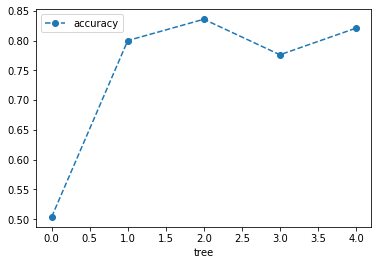

In [49]:
df.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')

In [50]:
alpha_loop_val = []

for ccp_alpha in ccp_alphas:
    cftdt = DecisionTreeClassifier(random_state = 40, ccp_alpha = ccp_alpha)
    scores = cross_val_score(cftdt, X_train_smote, y_train_smote, cv=10)
    alpha_loop_val.append([ccp_alpha, np.mean(scores), np.std(scores)])

In [51]:
alpha_result = pd.DataFrame(alpha_loop_val, 
                            columns = ['alpha', 'mean_accuracy', 'std'] )

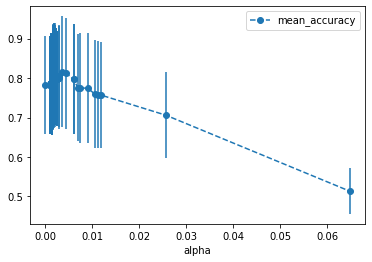

In [52]:
alpha_result.plot( x = 'alpha',
                 y = 'mean_accuracy',
                 yerr = 'std',
                 marker = 'o',
                 linestyle = '--')

In [53]:
# Finding the closest value which will give better accuracy

alpha_result[(alpha_result['alpha'] > 0.003) & alpha_result['alpha'] < 0.004]

,alpha,mean_accuracy,std
0,0.000000,0.781914,0.124822
1,0.000916,0.781914,0.124822
2,0.000963,0.781914,0.124822
3,0.000992,0.781914,0.124822
4,0.001083,0.784877,0.122602
5,0.001116,0.786392,0.125158
6,0.001240,0.787884,0.125294
7,0.001240,0.787884,0.125294
8,0.001240,0.787884,0.125294
9,0.001240,0.787884,0.125294


In [54]:
ideal_alpha = alpha_result[(alpha_result['alpha'] > 0.003) & alpha_result['alpha'] < 0.004]['alpha']

In [55]:
ideal_alpha = np.mean(ideal_alpha)

In [56]:
ideal_alpha

0.0016273216508635646

# Final Decision Tree

In [57]:
clf_final = DecisionTreeClassifier(min_samples_leaf = 3, max_depth = 6, random_state = 40, 
                                   ccp_alpha = ideal_alpha, criterion = 'gini')

In [58]:
clf_final.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0016273216508635646, max_depth=6,
                       min_samples_leaf=3, random_state=40)

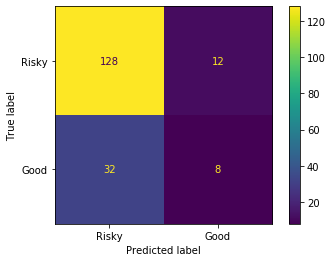

In [59]:
plot_confusion_matrix(clf_final, X_test, y_test, display_labels = ['Risky','Good'])

In [60]:
clf_final.score(X_test, y_test)

0.7555555555555555

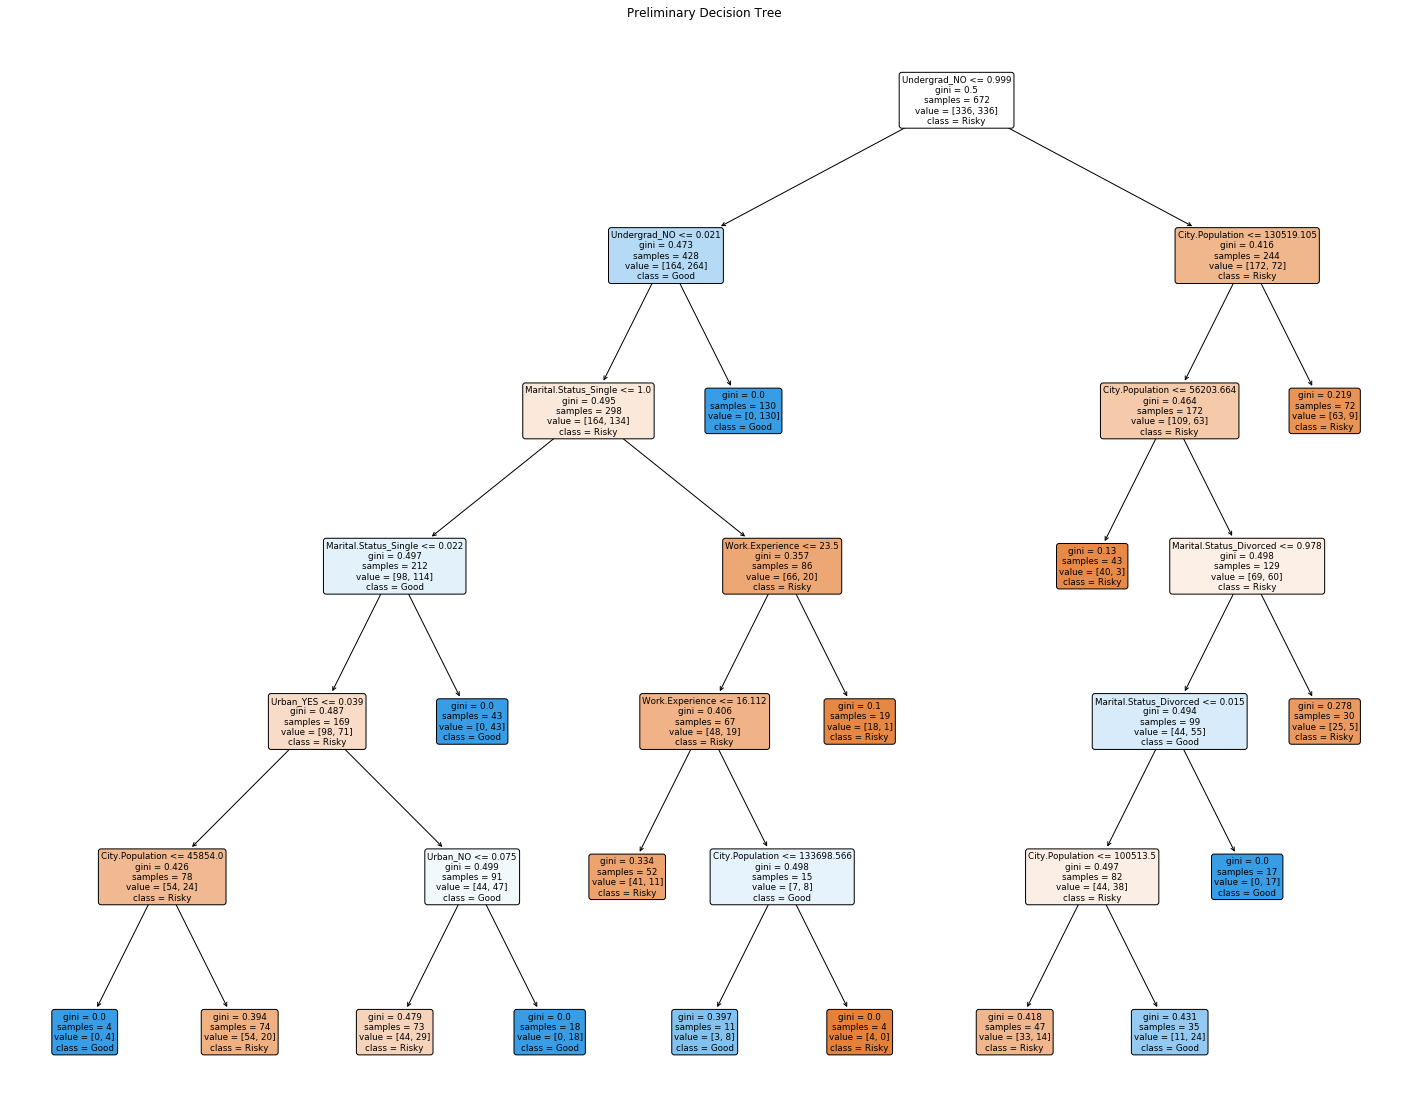

In [61]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,20))
tree.plot_tree(clf_final, 
               filled = True, 
               rounded = True, 
               class_names = ['Risky','Good'],
               feature_names = frx_encoded.columns)
plt.title('Preliminary Decision Tree')
plt.show()